In [ ]:
#Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Importing Facebook's Prophet
from fbprophet import Prophet

In [ ]:
dir(Prophet)

In [ ]:
#Loading Data Set
df = pd.read_csv("/content/India_Covid_Vaccination_Data.csv")

In [ ]:
df.tail()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
147,India,2021-06-16,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,258325900,210442950,47882950
148,India,2021-06-17,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,262970250,214553189,48417061
149,India,2021-06-18,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,266355940,217542993,48812947
150,India,2021-06-19,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,270908312,221493259,49415053
151,India,2021-06-20,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,274286599,224541283,49745316


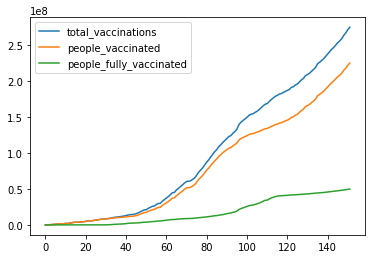

In [ ]:
df.plot()

In [ ]:
df.shape

(152, 7)

In [ ]:
df.drop("location", axis=1, inplace=True)
df.drop("vaccine", axis=1, inplace=True)
df.drop("source_url", axis=1, inplace=True)
df.drop("total_vaccinations", axis=1, inplace=True)
df.drop("people_vaccinated", axis=1, inplace=True)
#Removing the unnecessary columns

In [ ]:
df.head()

,date,people_fully_vaccinated
0,2021-01-15,0
1,2021-01-16,0
2,2021-01-17,0
3,2021-01-18,0
4,2021-01-19,0


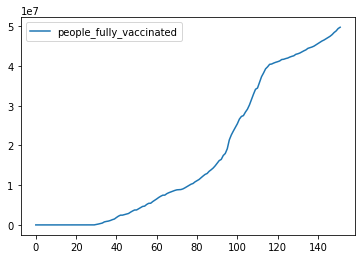

In [ ]:
df.plot()

In [ ]:
#Initilizing the Model
model = Prophet()

In [ ]:
df.columns

Index(['date', 'people_fully_vaccinated'], dtype='object')

In [ ]:
#Renaming the Columns
df.rename(columns={"date":"ds","people_fully_vaccinated":"y"}, inplace=True)

In [ ]:
df.head()

,ds,y
0,2021-01-15,0
1,2021-01-16,0
2,2021-01-17,0
3,2021-01-18,0
4,2021-01-19,0


In [ ]:
#Removing the Null Value
df = df[1:]

In [ ]:
df.head()

,ds,y
1,2021-01-16,0
2,2021-01-17,0
3,2021-01-18,0
4,2021-01-19,0
5,2021-01-20,0


In [ ]:
#Fit our Model to our Data
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df.shape

(151, 2)

In [ ]:
#Create Future Dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [ ]:
#Shape of the Data Set
future_dates.shape

(516, 1)

In [ ]:
future_dates.head()

,ds
0,2021-01-16
1,2021-01-17
2,2021-01-18
3,2021-01-19
4,2021-01-20


In [ ]:
#Make Predictions with our Model
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-16,-31651.430862,-259637.345562,420682.489601,-31651.430862,-31651.430862,117763.280371,117763.280371,117763.280371,117763.280371,117763.280371,117763.280371,0.0,0.0,0.0,86111.849509
1,2021-01-17,-29846.509145,-439818.128341,262950.399026,-29846.509145,-29846.509145,-53008.278963,-53008.278963,-53008.278963,-53008.278963,-53008.278963,-53008.278963,0.0,0.0,0.0,-82854.788108
2,2021-01-18,-28041.587428,-444575.082900,290937.305928,-28041.587428,-28041.587428,-45099.775069,-45099.775069,-45099.775069,-45099.775069,-45099.775069,-45099.775069,0.0,0.0,0.0,-73141.362497
3,2021-01-19,-26236.665711,-408959.707486,278151.958999,-26236.665711,-26236.665711,-40820.571597,-40820.571597,-40820.571597,-40820.571597,-40820.571597,-40820.571597,0.0,0.0,0.0,-67057.237308
4,2021-01-20,-24431.743995,-456823.656764,258340.764593,-24431.743995,-24431.743995,-65526.920668,-65526.920668,-65526.920668,-65526.920668,-65526.920668,-65526.920668,0.0,0.0,0.0,-89958.664662


**yhat -  predicted forecast**

**yhat_lower - lower border of the prediction**

**yhat_upper - upper border of the prediction**








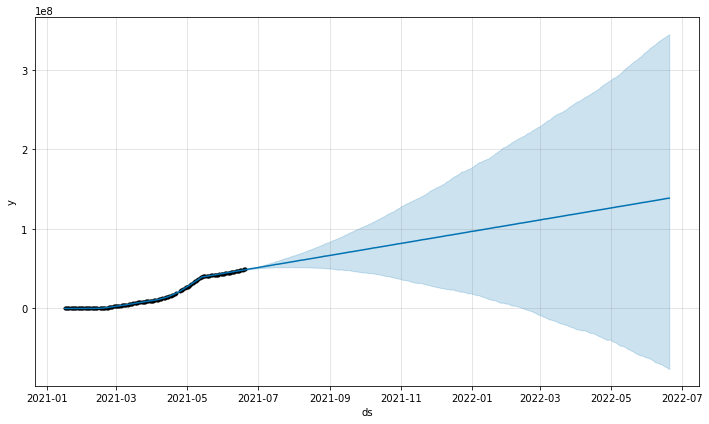

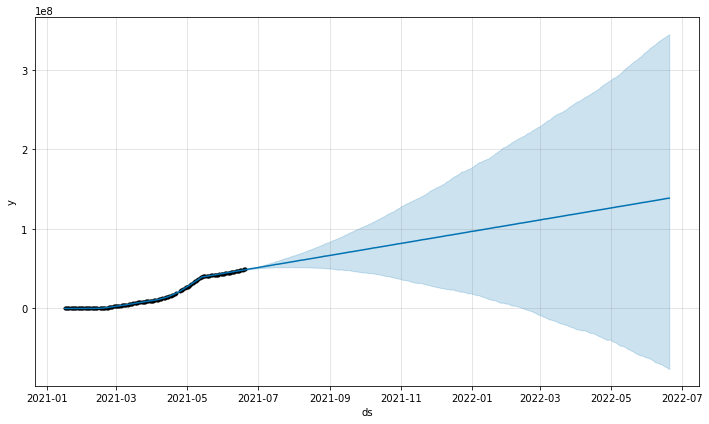

In [ ]:
#Plot the predictions
model.plot(prediction)

**black dots - the actual data points in our data set**

**deep blue lines - predicted forecast/ predicted values**

**light blue lines - boundaries**

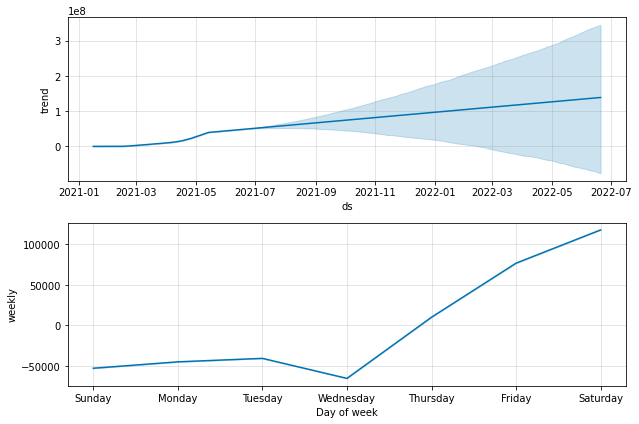

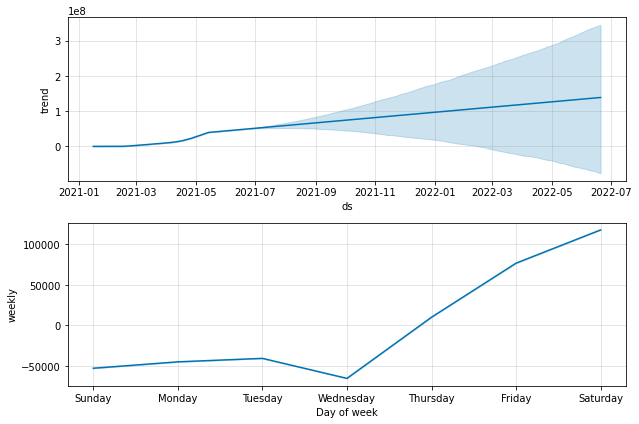

In [ ]:
#Visualize each Component (Trends/Weekly)
model.plot_components(prediction)

**Cross Validation**

For measuring forecast errors by comparing predicted value with actual value

initial - the size of the initial training period

period - spacing between cutoff dates

horizon -  the forecast horizon (ds minus cutoff)

By default, the initial training period is set to 3 times the horizon and cutoffs are made every half a horizon.

In [ ]:
#Loading Packages for Cross validation Diagnostics
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(model,initial='100 days', period='100 days', horizon='20 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-05-31 00:00:00 and 2021-05-31 00:00:00


**Performance Matrics**

In [ ]:
from fbprophet.diagnostics import performance_metrics

df_pm = performance_metrics(df_cv)

In [ ]:
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,2.114176e+13,4.598017e+06,4.596160e+06,0.105213,0.105213,0.0
1,3 days,2.467782e+13,4.967677e+06,4.962103e+06,0.112943,0.112943,0.0
2,4 days,2.893920e+13,5.379517e+06,5.376533e+06,0.121512,0.121512,0.0
3,5 days,3.388531e+13,5.821109e+06,5.815316e+06,0.130621,0.130621,0.0
4,6 days,3.803876e+13,6.167557e+06,6.166872e+06,0.138013,0.138013,0.0
5,7 days,4.206640e+13,6.485862e+06,6.482019e+06,0.144428,0.144428,0.0
6,8 days,4.909109e+13,7.006503e+06,7.000288e+06,0.155013,0.155013,0.0
7,9 days,5.473885e+13,7.398571e+06,7.397861e+06,0.162672,0.162672,0.0
8,10 days,5.921655e+13,7.695229e+06,7.692822e+06,0.167971,0.167971,0.0
9,11 days,6.552750e+13,8.094906e+06,8.092259e+06,0.175440,0.175440,0.0


**Visualizing Performance Metrics**

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

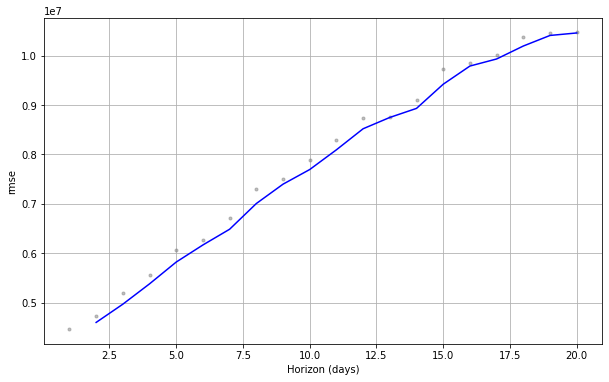

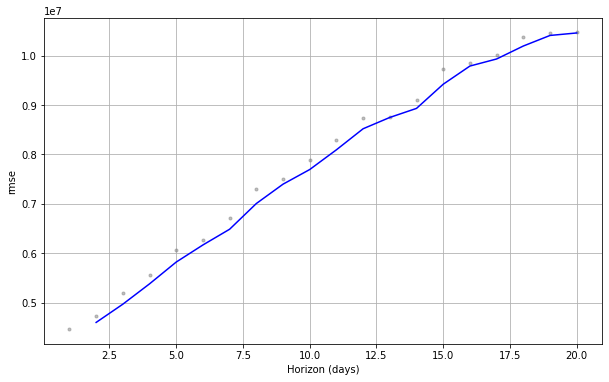

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse')

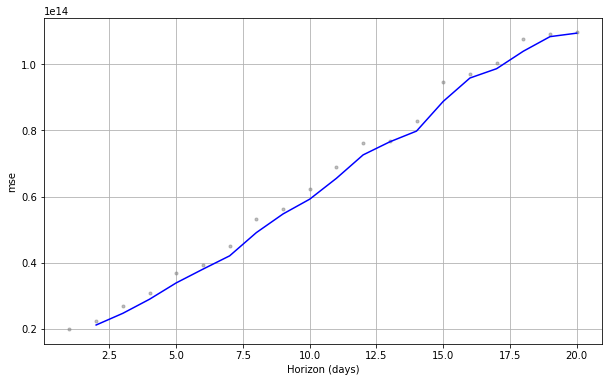

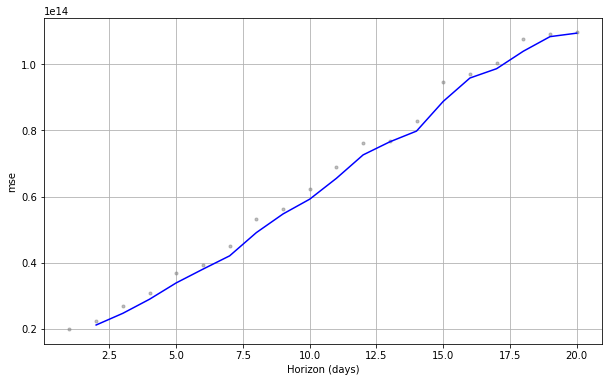

In [ ]:
plot_cross_validation_metric(df_cv, metric='mse')

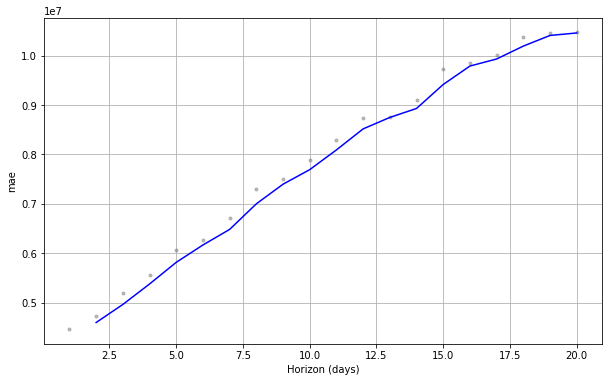

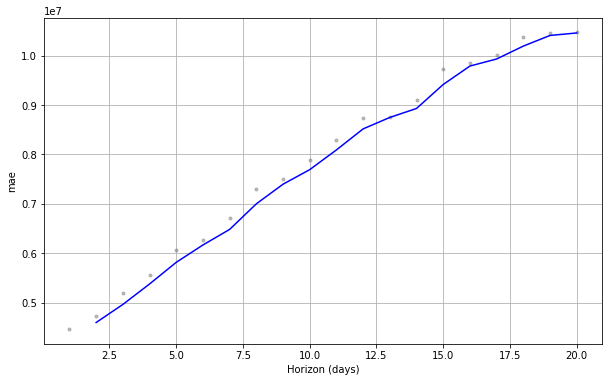

In [ ]:
plot_cross_validation_metric(df_cv, metric='mae')

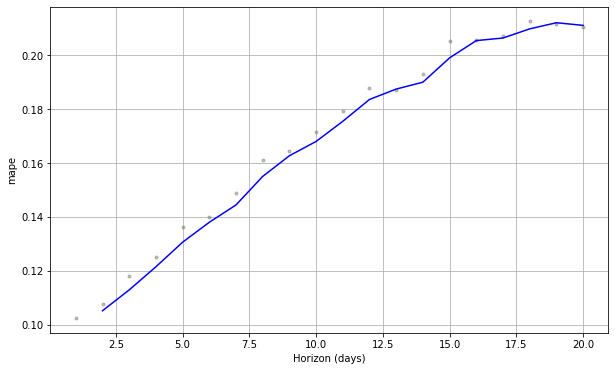

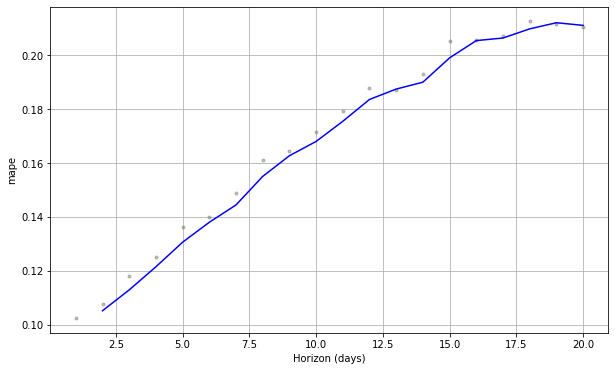

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape')

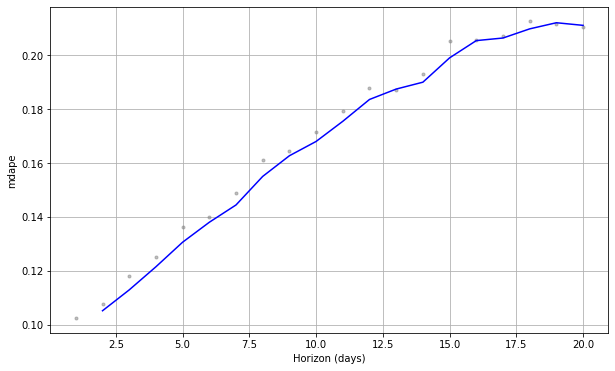

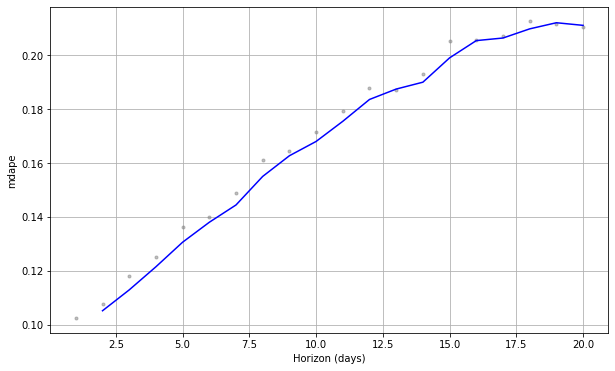

In [ ]:
plot_cross_validation_metric(df_cv, metric='mdape')